In [1]:
import sys
sys.path.insert(0, 'D:\Pulpit\FaceProject')

In [9]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

^C


In [5]:
import bz2
fromF = bz2.open("shape_predictor_68_face_landmarks.dat.bz2", "rb")
data = fromF.read()
toF = open("shape_predictor_68_face_landmarks.dat", "wb")
toF.write(data)

99693937

In [6]:
import helper as h

In [7]:
from imutils import face_utils
from scipy.spatial import Delaunay
from itertools import combinations
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
babka = cv2.imread('kanye.jpg')
babka = cv2.resize(babka, (600,400))
vertices = np.array([(230, 223), (227, 203), (261, 192)], dtype=np.float32)
ja = cv2.imread('ja.jpg')
ja = cv2.resize(ja, (600,400))
new_vertices = np.array([(289, 180), (288, 164), (311, 151)], dtype=np.float32)

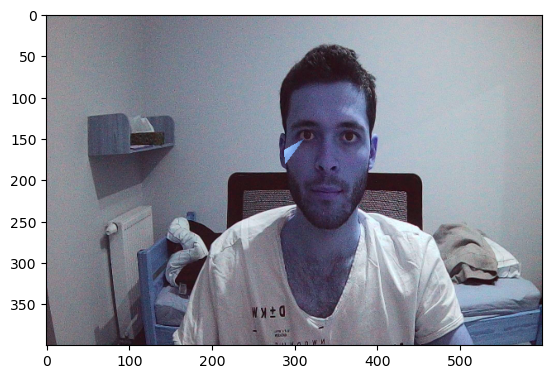

In [11]:
x = h.mapT2T(babka, ja, vertices, new_vertices)
plt.imshow(x)

In [51]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [67]:
rect = detector(ja,0)
x = predictor(ja, rect[0])
face_utils.shape_to_np(x)

array([[289, 149],
       [289, 164],
       [290, 180],
       [292, 195],
       [296, 211],
       [302, 226],
       [311, 240],
       [324, 250],
       [339, 253],
       [355, 251],
       [368, 241],
       [377, 228],
       [384, 214],
       [388, 199],
       [390, 183],
       [392, 168],
       [393, 153],
       [296, 140],
       [301, 131],
       [311, 127],
       [322, 128],
       [332, 132],
       [350, 133],
       [361, 129],
       [372, 129],
       [382, 134],
       [387, 143],
       [340, 147],
       [340, 158],
       [340, 170],
       [339, 182],
       [328, 188],
       [333, 191],
       [339, 193],
       [345, 191],
       [351, 189],
       [306, 148],
       [312, 142],
       [320, 143],
       [326, 150],
       [319, 151],
       [311, 151],
       [356, 150],
       [363, 144],
       [371, 144],
       [376, 150],
       [371, 153],
       [363, 153],
       [321, 214],
       [327, 210],
       [334, 208],
       [339, 210],
       [345,

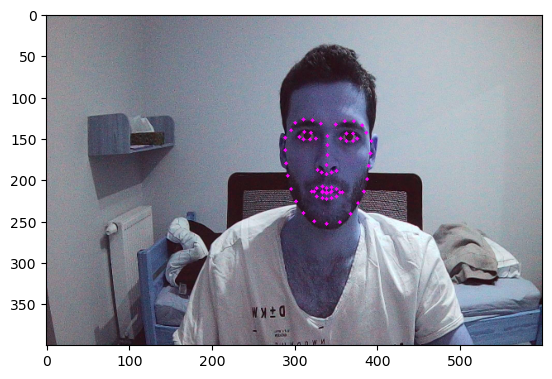

In [53]:
babkaCoords = h.drawCoords(ja)
plt.imshow(babkaCoords)

In [54]:
INDICES = h.fileToNumpy('trianglesIndices.txt')

In [55]:
INDICES.shape

(113, 3)

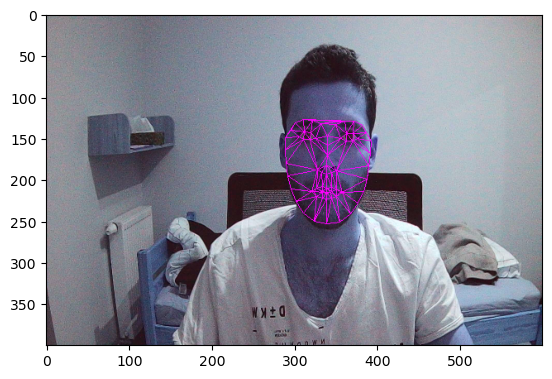

In [56]:
x = h.drawLines(ja)
plt.imshow(x)

In [57]:
indices, src_coords = h.getTrianglesCoords(babka, None)
_, dest_coords = h.getTrianglesCoords(ja, indices)

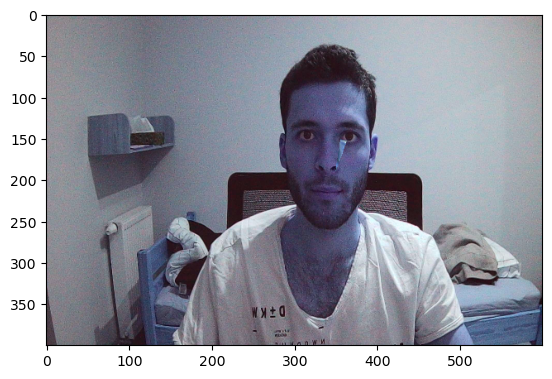

In [58]:
x = h.mapT2T(babka, ja, src_coords[10], dest_coords[10])
plt.imshow(x)

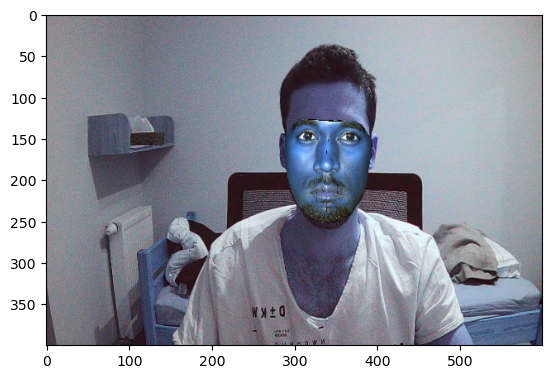

In [19]:
x = h.swapAll(babka, ja, src_coords, dest_coords)
plt.imshow(x)

In [20]:
cap = cv2.VideoCapture(0)
 
while True:
    _, image = cap.read()
    _, dest_coords = h.getTrianglesCoords(image, trianglesIndices=indices)
    if type(dest_coords) != type(None):
        x = h.swapAll(babka, image, src_coords, dest_coords)
    else:
        x = image

    cv2.imshow("Output1", x)    
    
    #close on Esc
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()


     0K .......... .......... .......... .......... ..........  0% 86,3M 1s
    50K .......... .......... .......... .......... ..........  0%  213K 2m27s
   100K .......... .......... .......... .......... ..........  0%  213K 3m16s
   150K .......... .......... .......... .......... ..........  0%  425K 3m3s
   200K .......... .......... .......... .......... ..........  0%  213K 3m25s
   250K .......... .......... .......... .......... ..........  0%  425K 3m15s
   300K .......... .......... .......... .......... ..........  0%  423K 3m8s
   350K .......... .......... .......... .......... ..........  0%  213K 3m21s
   400K .......... .......... .......... .......... ..........  0%  423K 3m15s
   450K .......... .......... .......... .......... ..........  0%  213K 3m24s
   500K .......... .......... .......... .......... ..........  0%  425K 3m19s
   550K .......... .......... .......... .......... ..........  0%  423K 3m14s
   600K .......... .......... .......... .......... ....

In [86]:
from typing import Callable
from PIL import Image

In [117]:
class Face:
    def __init__(self, indices: np.array = INDICES) -> None:
        self.image = np.ones((600,400), dtype=np.uint8)*255
        self.detector = None
        self.predictor = None
        self.rectangle = None
        self.indices = indices

        self.tris_coords = None
        self.tris_bboxes = None
        self.tris_images = None

        self.trans_tris_coords = None
        self.trans_tris_coords_min = None
        self.trans_tris_bboxes = None




    def init(self, img: np.array, 
                 rectangle: np.array,
                 indices: np.array,
                 detector: Callable[[np.array], np.array], 
                 predictor: Callable[[np.array], np.array]) -> None:
        
        self.image = img
        self.detector = detector
        self.predictor = predictor
        self.rectangle = rectangle
        self.indices = indices

        self.tris_coords = self._init_tris_coords()
        self.tris_coords_min = self.minimize_coords(self.tris_coords)
        self.tris_bboxes = self._init_tris_bboxes()
        self.tris_images = self._init_tris_images()

        self.trans_tris_coords = self.tris_coords
        self.trans_tris_coords_min = self.minimize_coords(self.trans_tris_coords)
        self.trans_tris_bboxes = self.tris_bboxes

    def _init_tris_coords(self) -> np.array:
        predictions = self.predictor(self.image, self.rectangle)
        predictions = face_utils.shape_to_np(predictions)
        return predictions[self.indices]
    
    def _init_tris_bboxes(self) -> np.array:
        bboxes = []
        for triangle in self.tris_coords:
            bboxes.append(np.array(cv2.boundingRect(triangle)))
        return np.array(bboxes)
    
    def _init_tris_images(self) -> list:
        images = []
        for bbox in self.tris_bboxes:
            x, y, w, h = bbox
            images.append(
                self.image[y:y+h, x:x+w]
            )
        return images
    
    def minimize_coords(self, tris_coords) -> np.array:
        coords = tris_coords.copy()
        print(coords[:,:,0])
    
ja = cv2.imread('ja.jpg')
rect = detector(ja, 0)[0]
f = Face()
f.init(ja, rect, INDICES, detector, predictor)

[[ 947  925  966]
 [1188 1254 1247]
 [1254 1188 1206]
 [1240 1224 1257]
 [1240 1206 1224]
 [1254 1240 1257]
 [1240 1254 1206]
 [1171 1127 1202]
 [1239 1124 1247]
 [1124 1188 1247]
 [1188 1124 1162]
 [1124 1088 1162]
 [1088 1124 1086]
 [1188 1187 1206]
 [1224 1187 1190]
 [1206 1187 1224]
 [1187 1154 1190]
 [1187 1188 1162]
 [1026  977  953]
 [ 938 1026  953]
 [1026 1049 1036]
 [1070 1045 1007]
 [1045 1070 1089]
 [1088 1139 1162]
 [1225 1149 1239]
 [1149 1124 1239]
 [1127 1149 1202]
 [1149 1225 1202]
 [1086 1087 1068]
 [1048 1026 1036]
 [1048 1070 1007]
 [ 977 1048 1007]
 [1026 1048  977]
 [1187 1161 1154]
 [1154 1161 1119]
 [1161 1139 1119]
 [1161 1187 1162]
 [1139 1161 1162]
 [1065 1154 1119]
 [ 998  998  966]
 [1139 1091 1119]
 [1091 1065 1119]
 [1065 1091 1045]
 [1051 1049 1026]
 [1051  938  930]
 [1051 1026  938]
 [1051 1086 1068]
 [1051 1088 1086]
 [1149 1126 1124]
 [1104 1171 1133]
 [1171 1104 1127]
 [1087 1072 1068]
 [1072 1087 1087]
 [1072 1051 1068]
 [1051 1072 1049]
 [1048 107

C:\Users\stani\AppData\Local\Temp\ipykernel_10200\1057900497.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


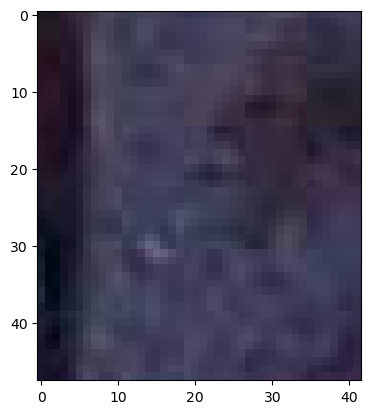

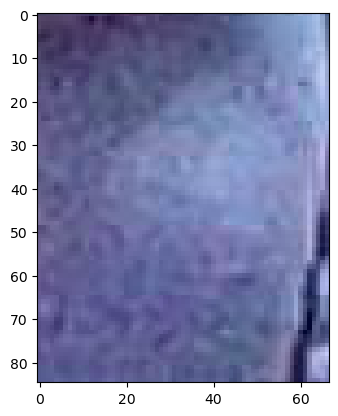

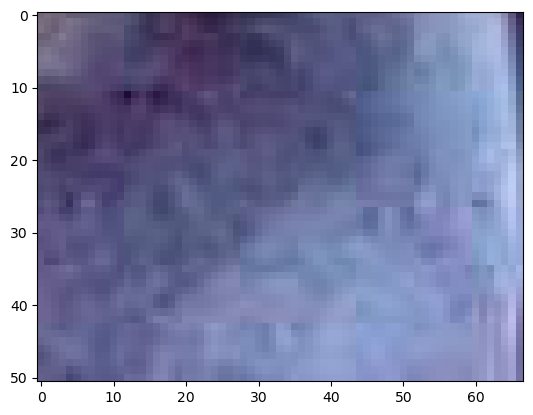

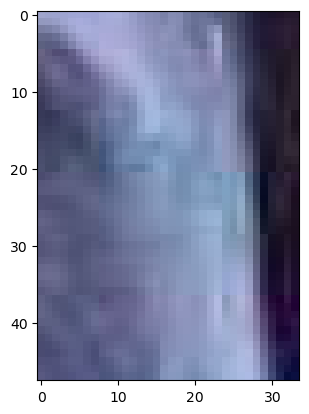

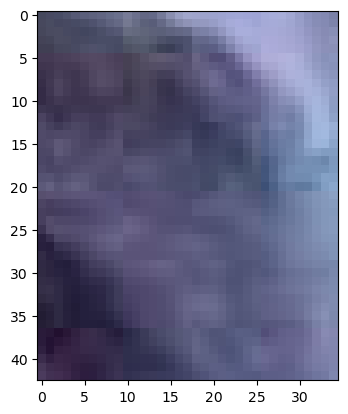

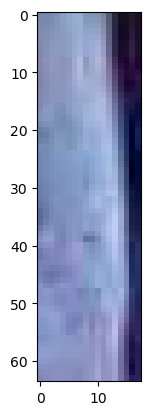

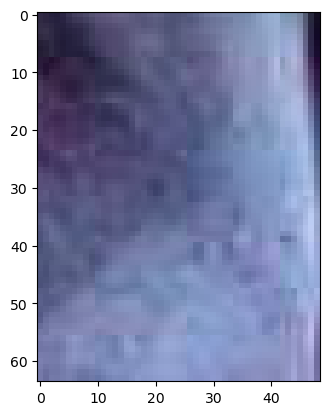

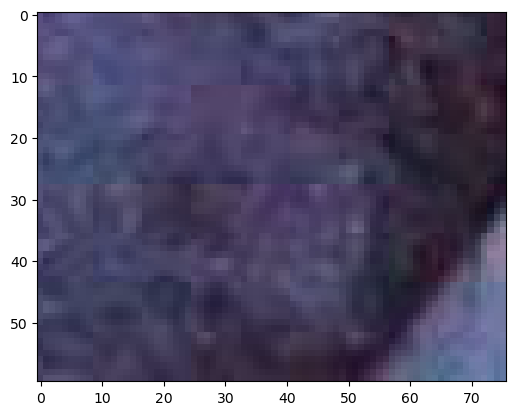

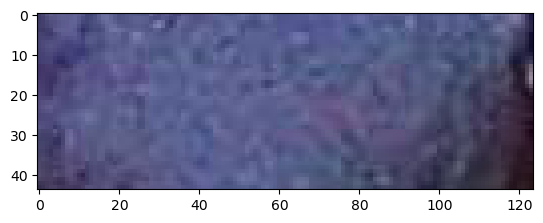

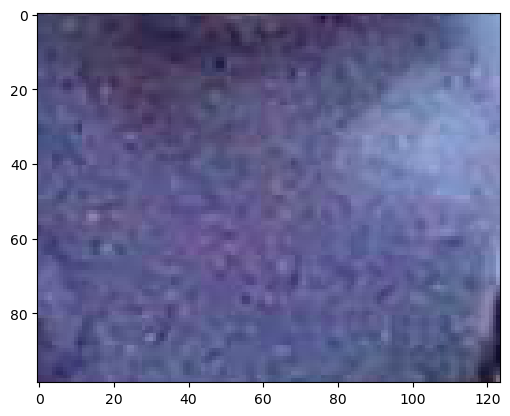

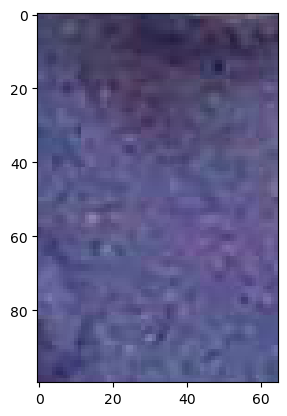

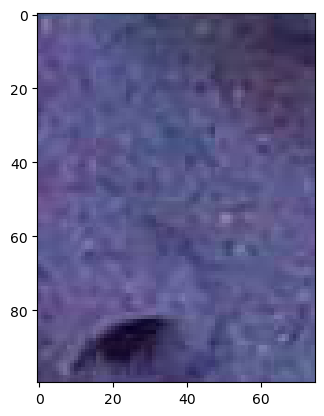

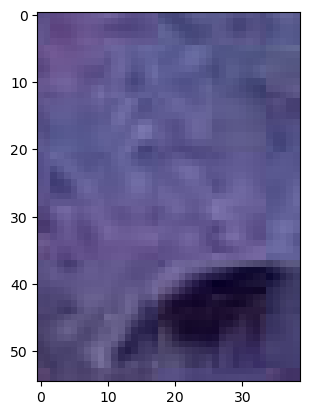

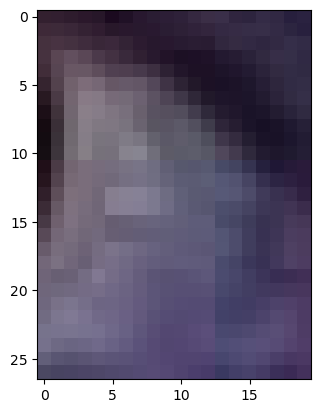

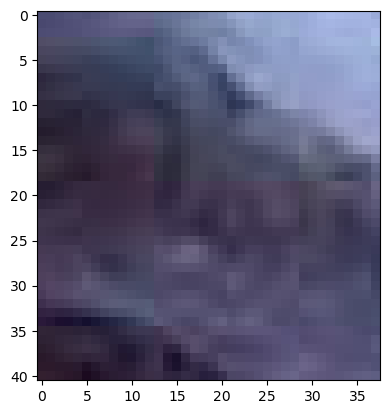

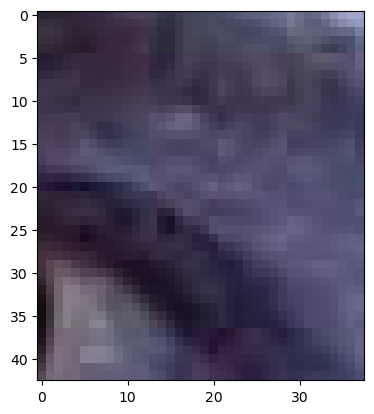

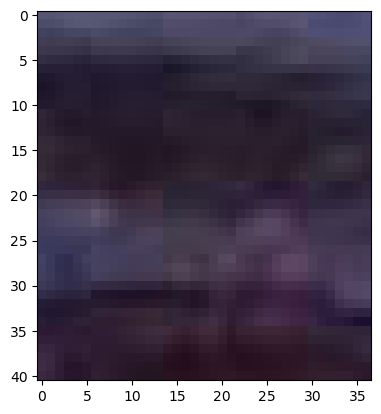

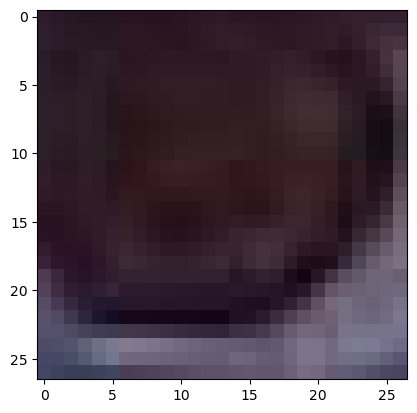

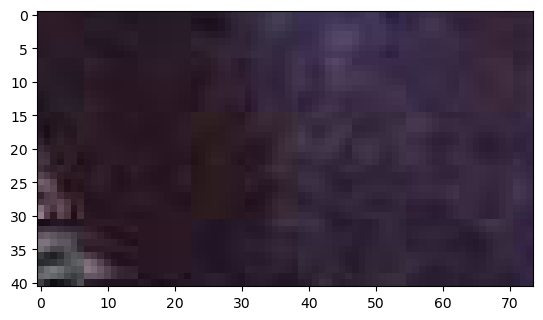

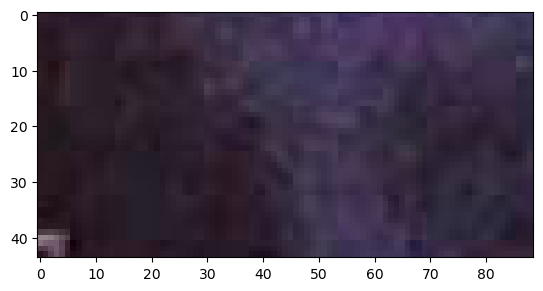

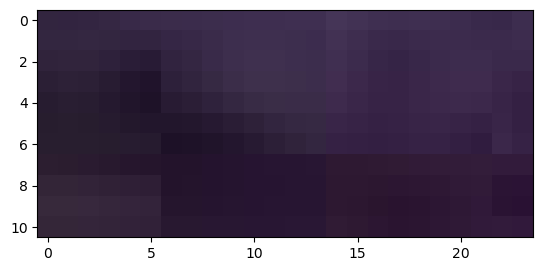

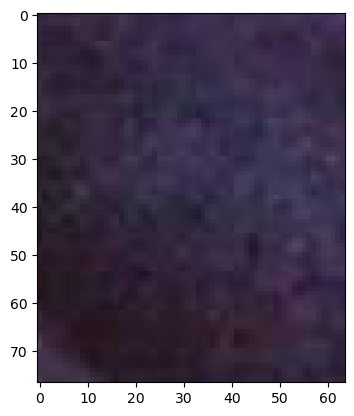

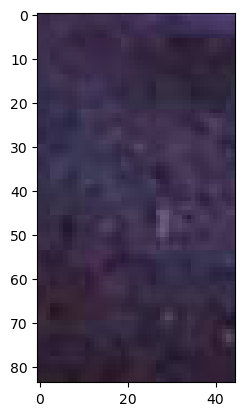

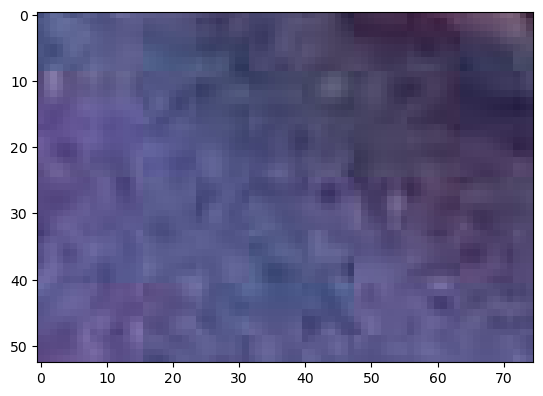

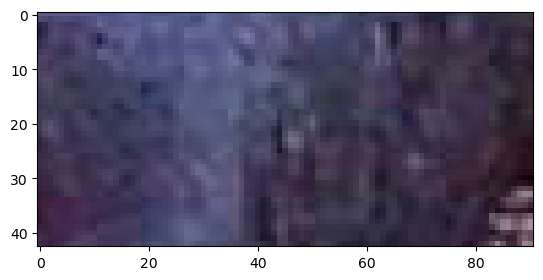

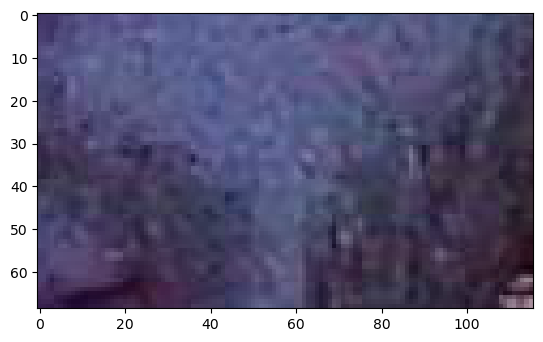

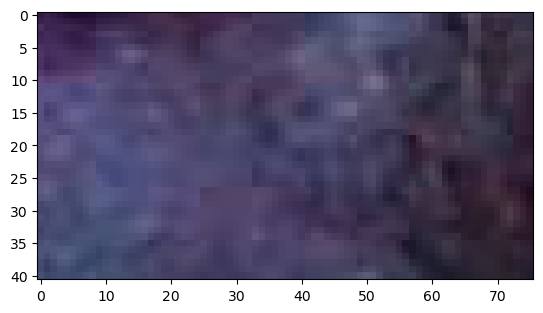

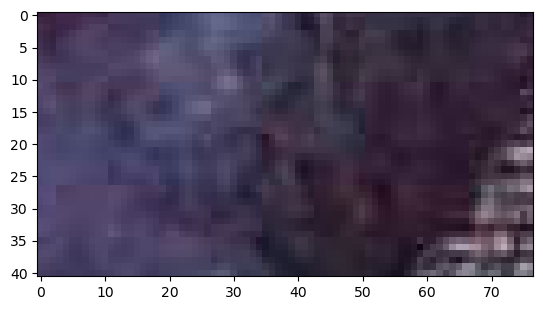

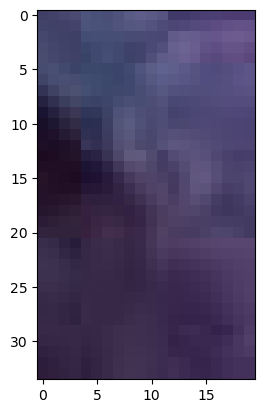

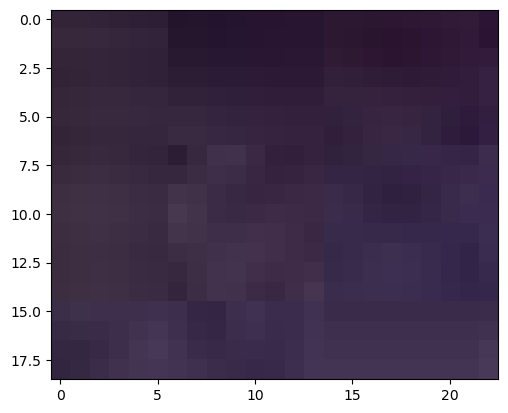

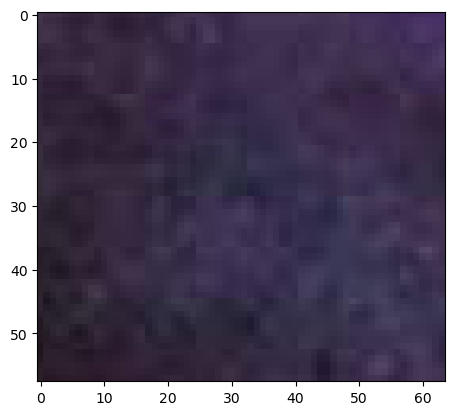

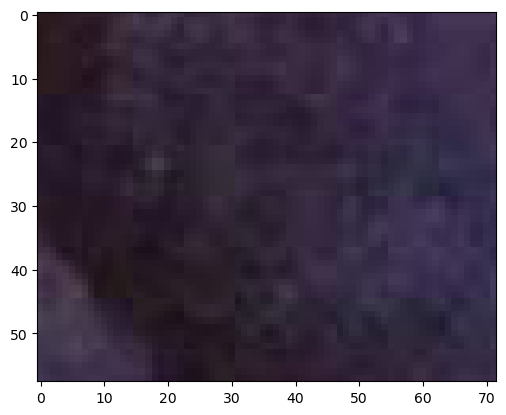

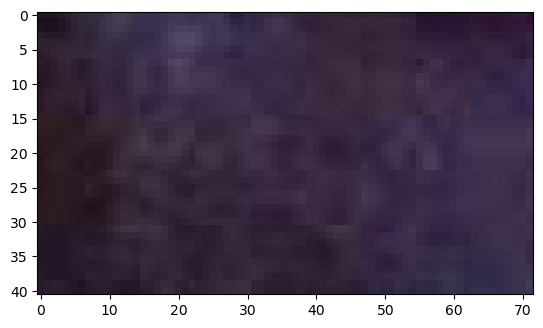

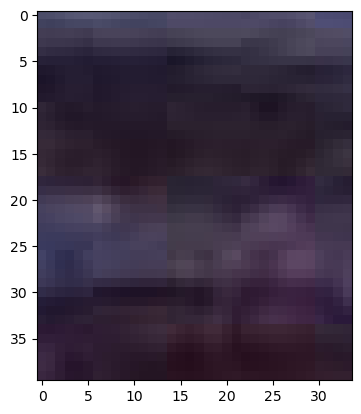

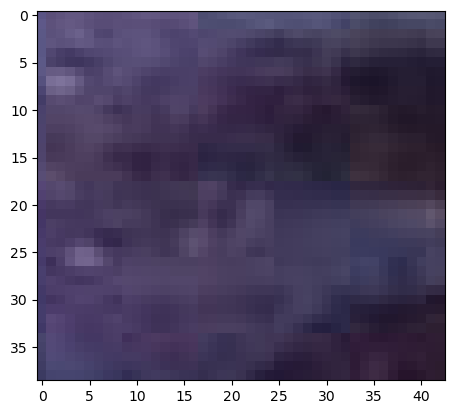

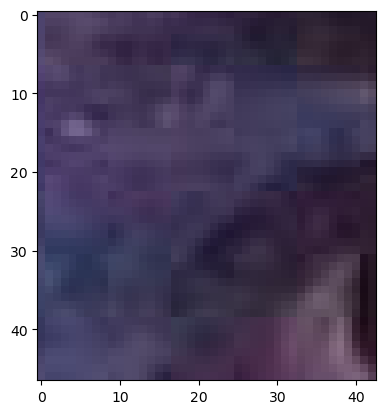

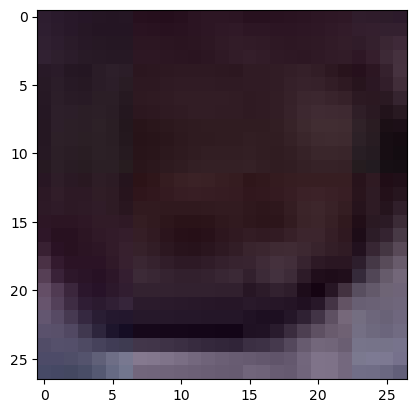

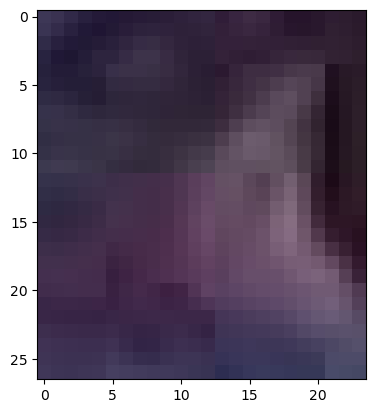

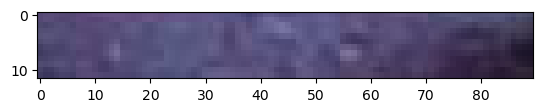

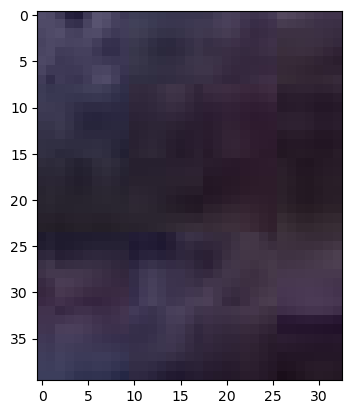

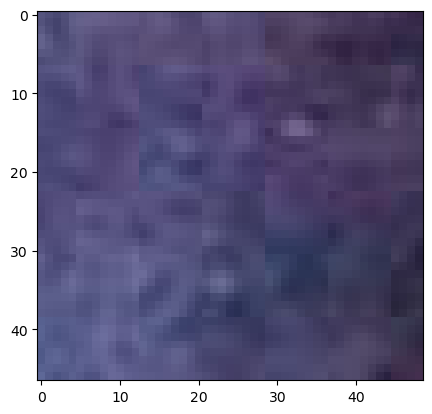

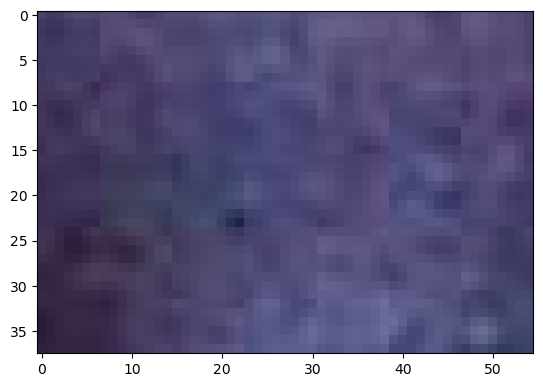

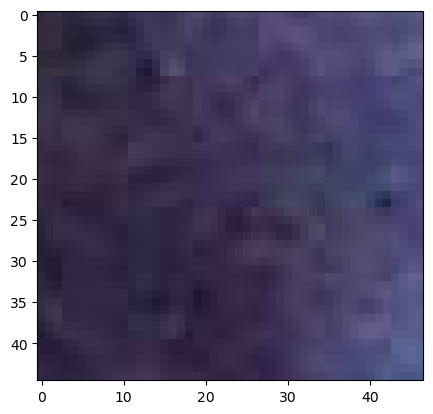

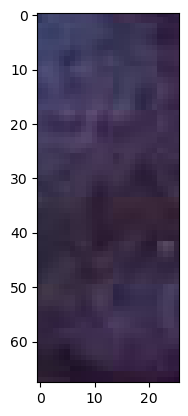

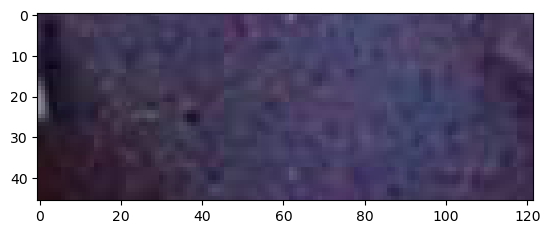

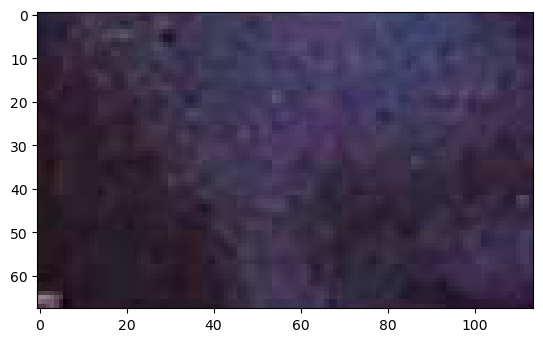

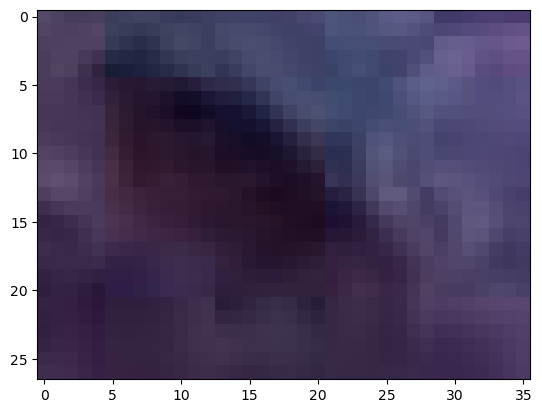

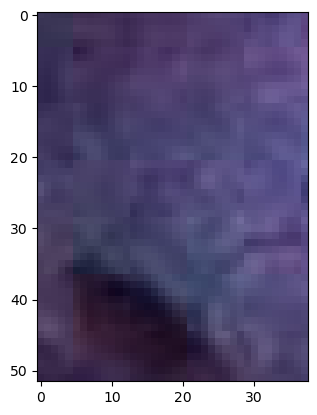

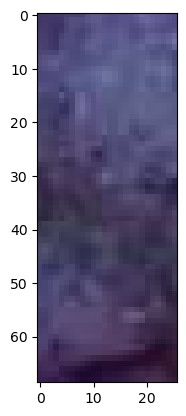

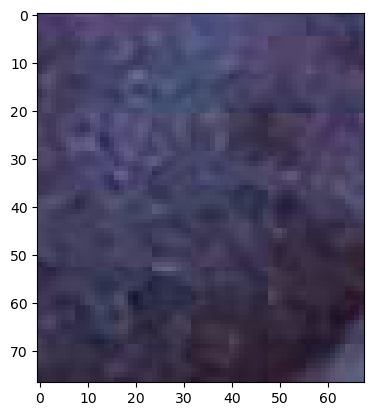

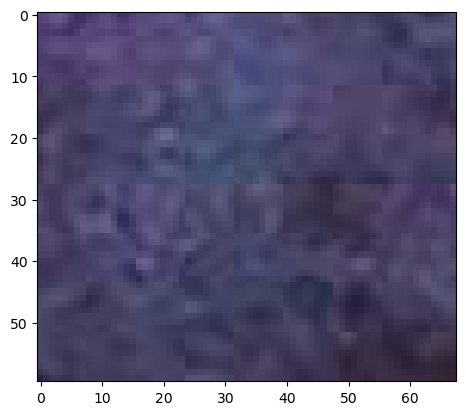

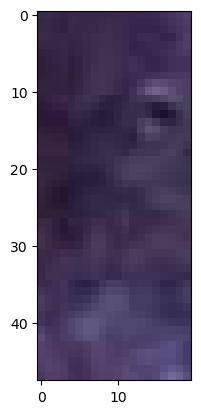

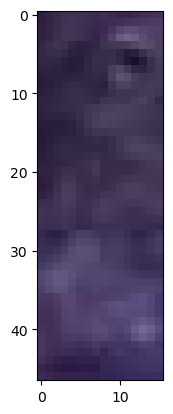

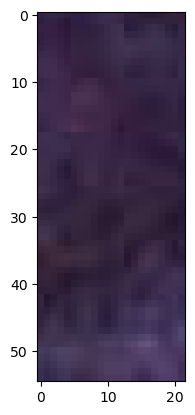

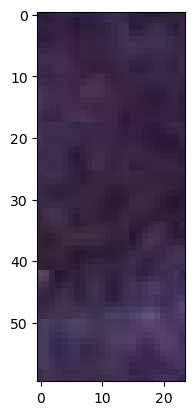

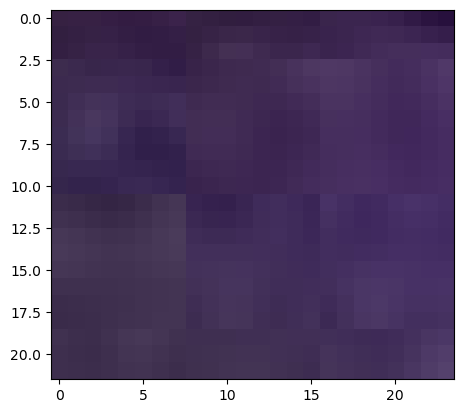

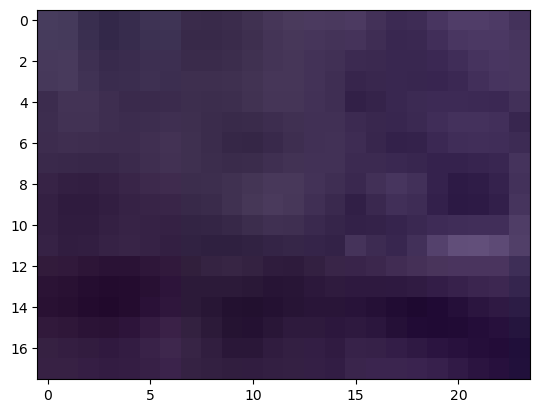

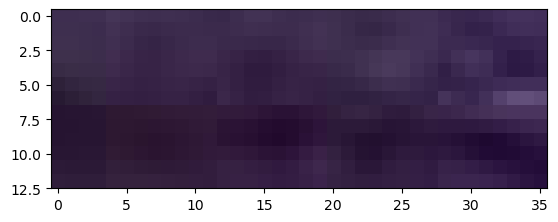

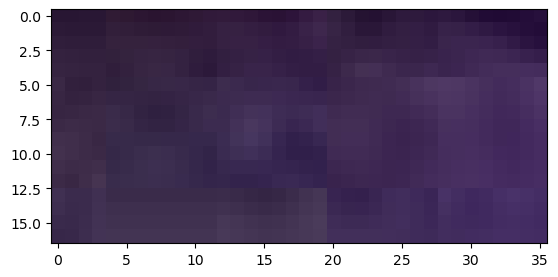

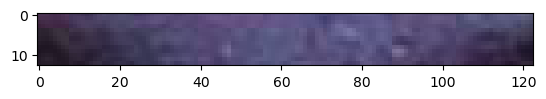

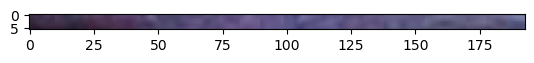

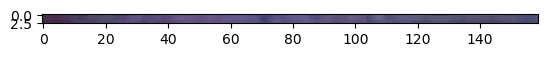

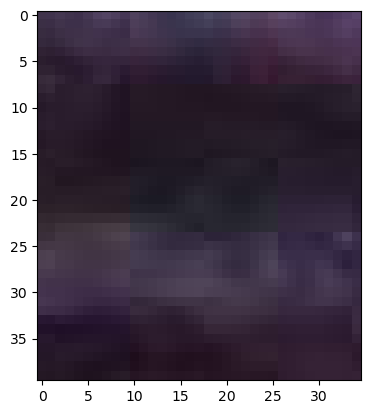

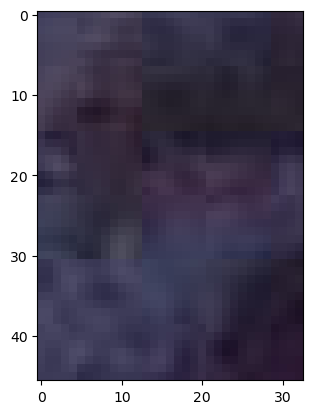

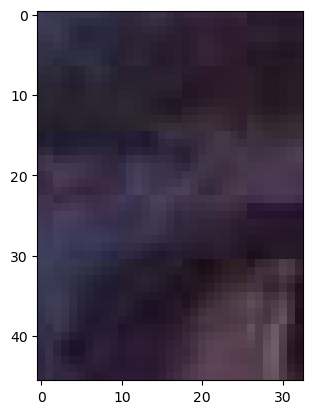

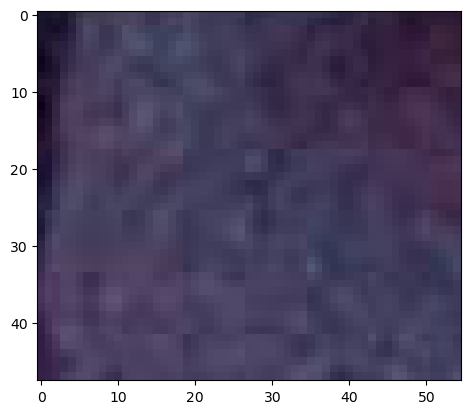

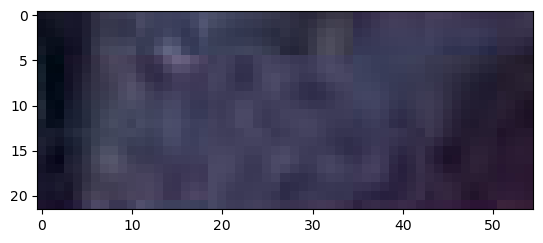

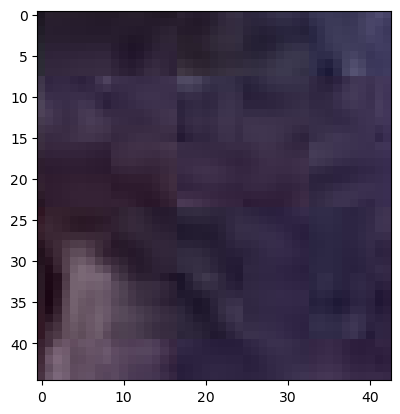

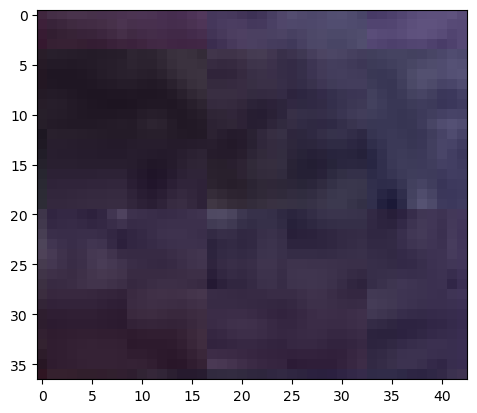

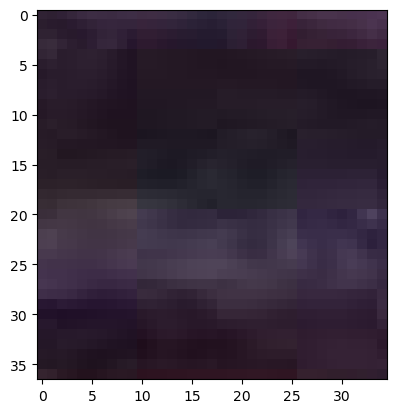

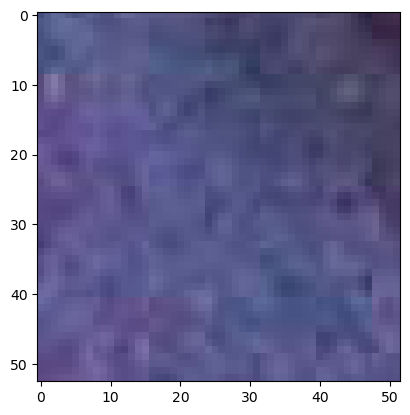

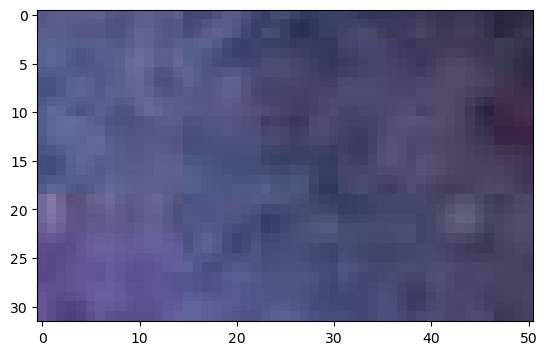

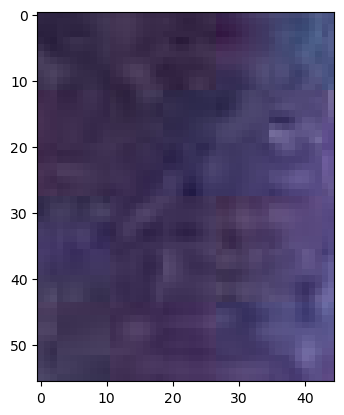

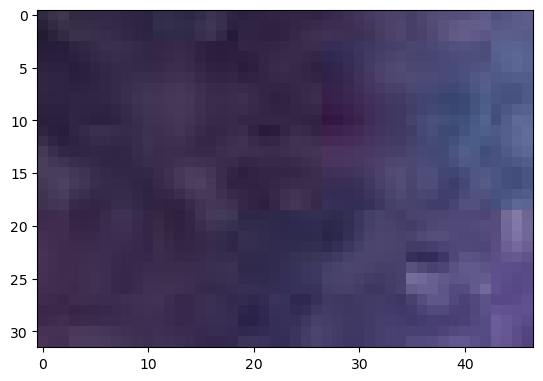

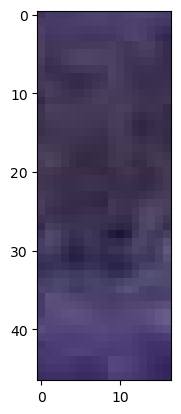

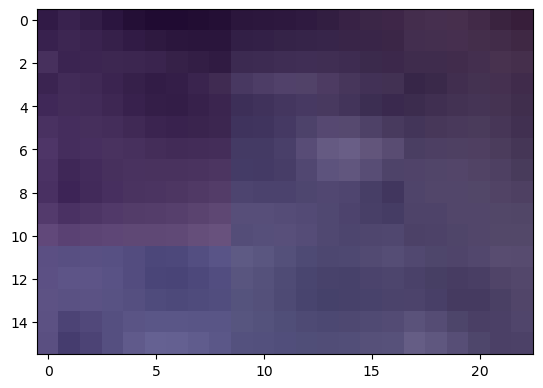

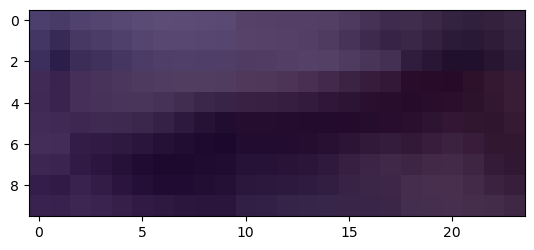

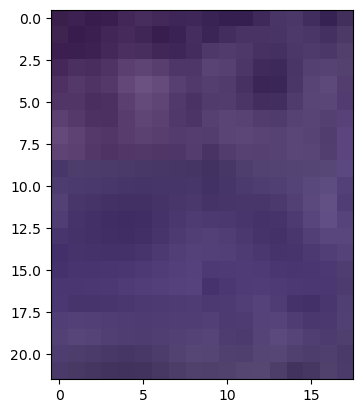

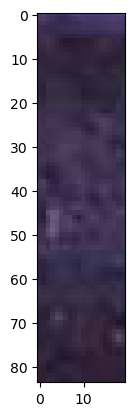

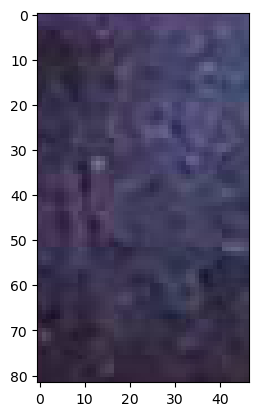

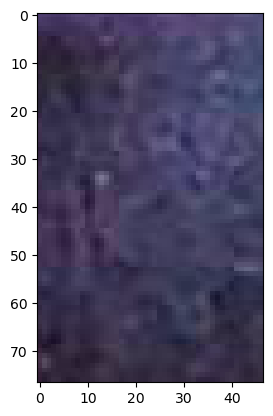

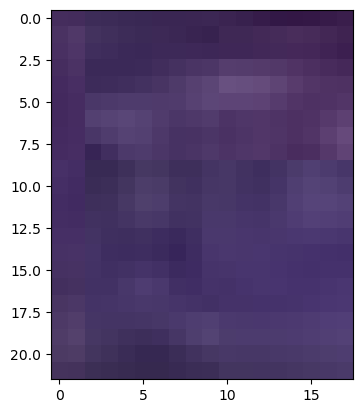

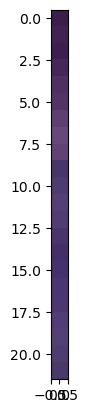

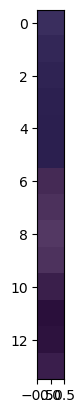

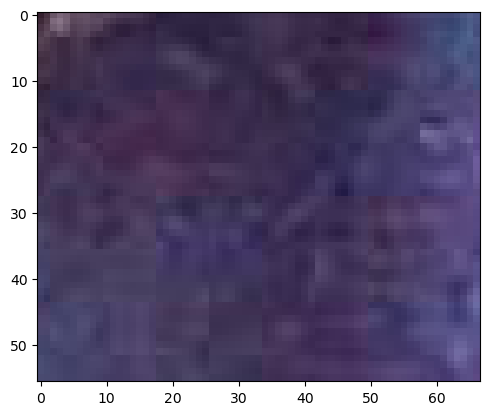

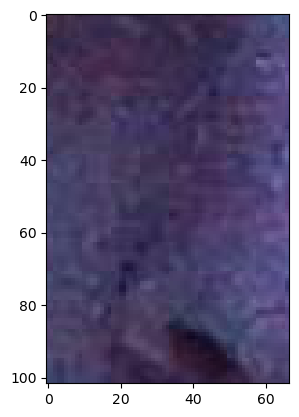

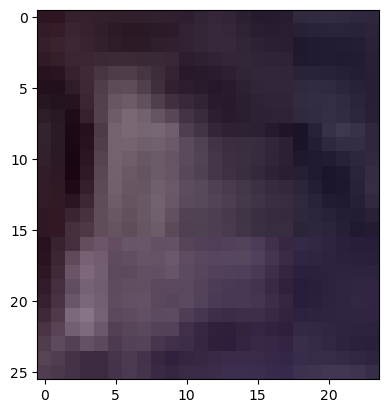

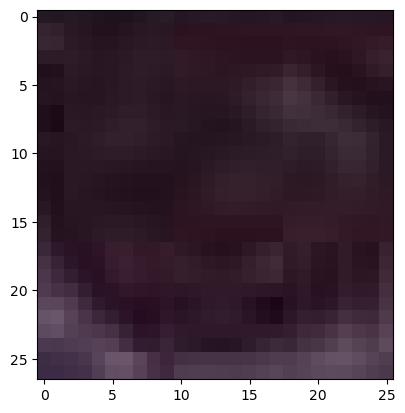

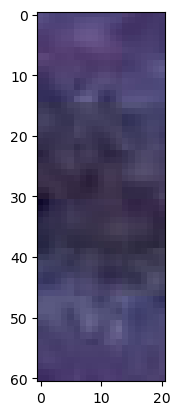

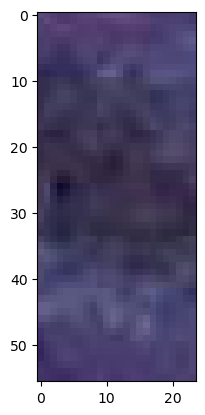

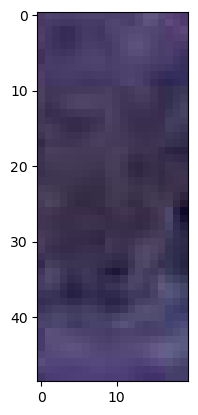

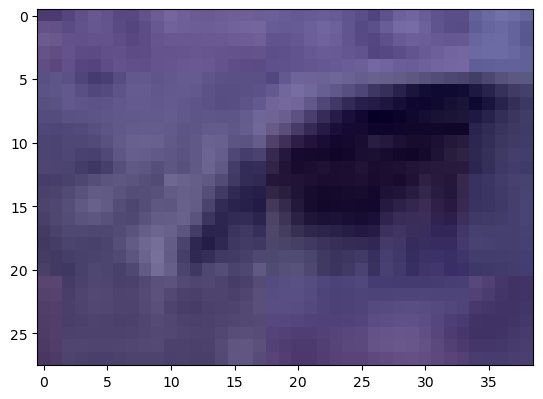

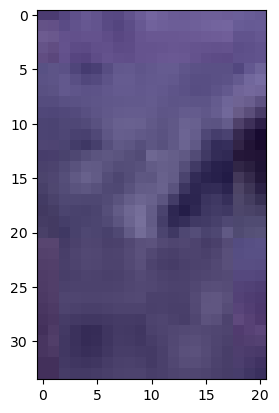

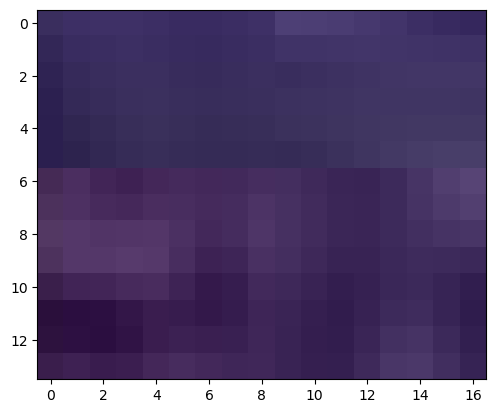

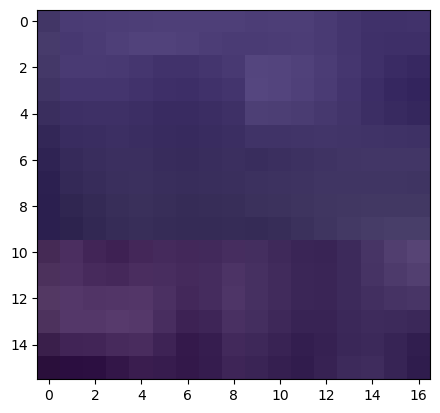

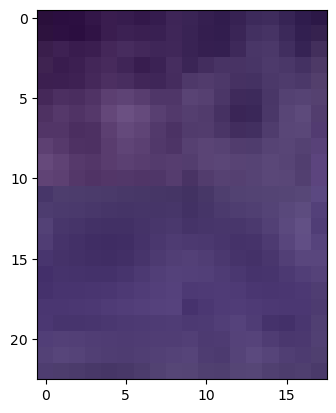

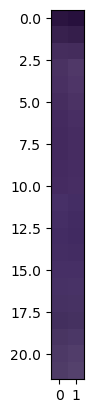

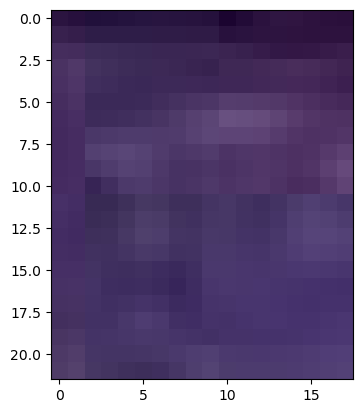

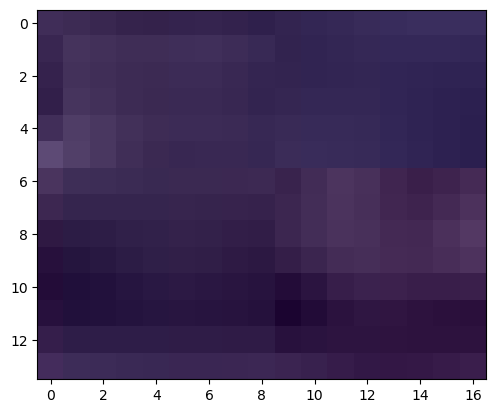

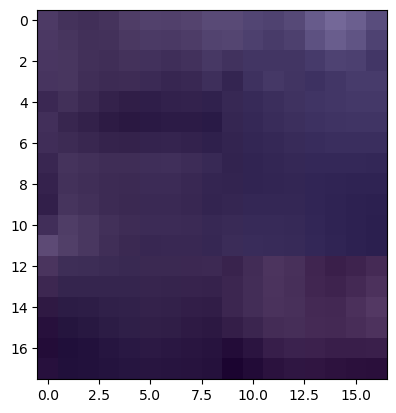

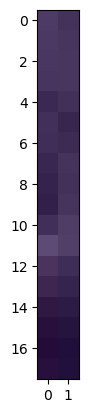

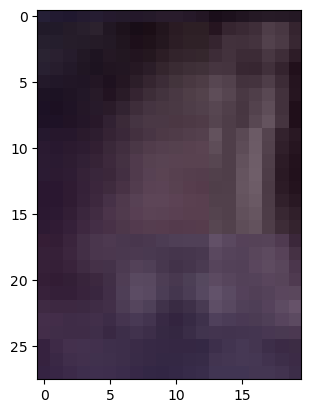

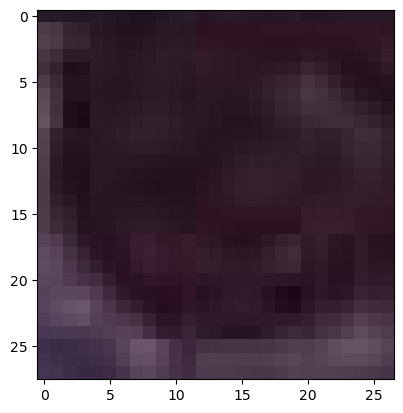

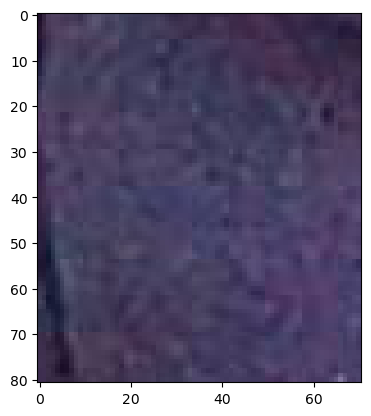

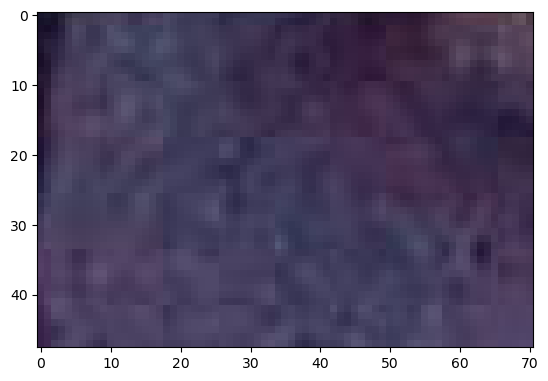

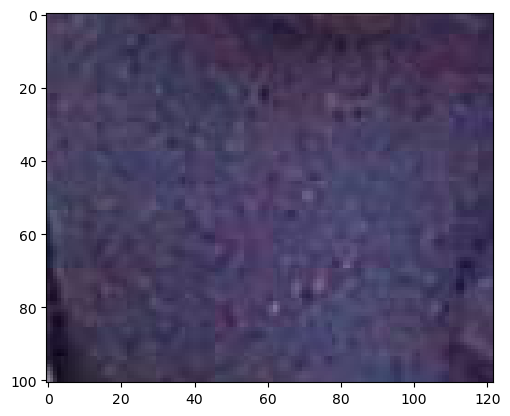

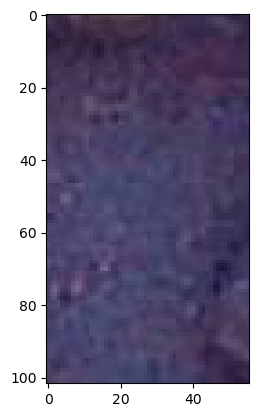

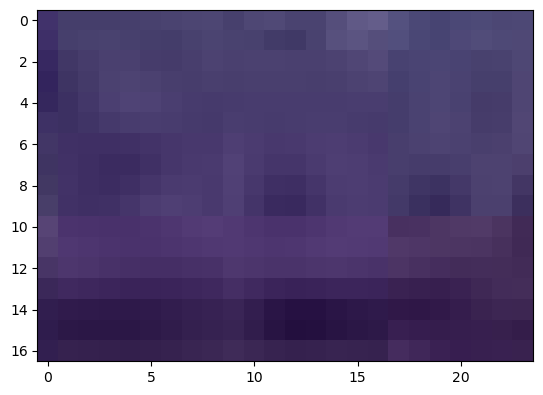

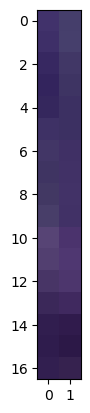

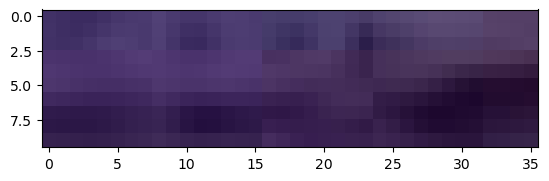

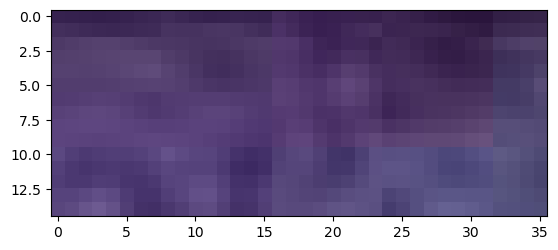

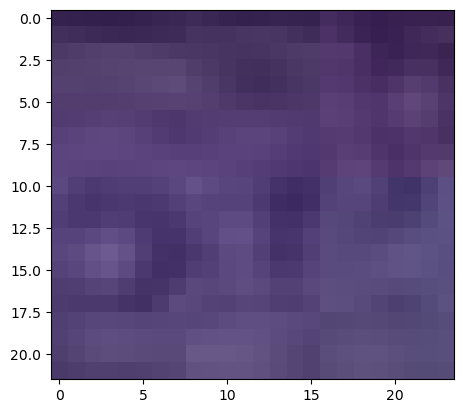

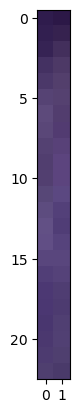

<Figure size 640x480 with 0 Axes>

In [116]:
for image in f.tris_images:
    plt.imshow(image)
    plt.figure()